<a href="https://colab.research.google.com/github/Pistolll/prak4_tmoc/blob/main/4tmoc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Установка необходимых библиотек с помощью pip
!pip install scrapy nest_asyncio nltk matplotlib pymystem3 pandas

# Импорт библиотек для парсинга веб-страниц
import scrapy
# Импорт класса для запуска паука Scrapy
from scrapy.crawler import CrawlerProcess
# Импорт Counter для подсчета частоты элементов
from collections import Counter
# Импорт модуля для работы с регулярными выражениями
import re
# Импорт библиотеки для работы с асинхронными событиями
import nest_asyncio
# Импорт библиотеки для обработки естественного языка
import nltk
# Импорт стоп-слов (слов, которые обычно исключают из анализа)
from nltk.corpus import stopwords
# Импорт модуля для построения графиков
import matplotlib.pyplot as plt
# Импорт лемматизатора для русского языка
from pymystem3 import Mystem
# Импорт библиотеки для работы с табличными данными
import pandas as pd

# Применение nest_asyncio для разрешения вложенных асинхронных циклов событий
# (необходимо для работы Scrapy в Jupyter ноутбуках)
nest_asyncio.apply()

In [2]:
# Скачивание стоп-слов для русского языка
nltk.download('stopwords')
stop_words = set(stopwords.words('russian'))

# Инициализация морфологического анализатора
mystem = Mystem()



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# Создание класса паука (Spider) для Scrapy, наследуемого от базового класса scrapy.Spider
class WikiSpider(scrapy.Spider):
    # Имя паука (должно быть уникальным в рамках проекта)
    name = "wiki_spider"
    # Стартовые URL-адреса, с которых начнётся парсинг (в данном случае статья Википедии об ИТ)
    start_urls = ['https://ru.wikipedia.org/wiki/%D0%98%D0%BD%D1%84%D0%BE%D1%80%D0%BC%D0%B0%D1%86%D0%B8%D0%BE%D0%BD%D0%BD%D1%8B%D0%B5_%D1%82%D0%B5%D1%85%D0%BD%D0%BE%D0%BB%D0%BE%D0%B3%D0%B8%D0%B8']
    # Пользовательские настройки для паука
    custom_settings = {
        'ROBOTSTXT_OBEY': True,  # Соблюдать правила robots.txt
        'DOWNLOAD_DELAY': 1,     # Задержка между запросами (1 секунда)
        'USER_AGENT': 'MyBot (example@example.com)'  # Заголовок User-Agent для идентификации бота
    }

    # Основной метод парсинга, вызываемый для каждого ответа сервера
    def parse(self, response):
        # Извлечение текста из всех HTML-параграфов (<p>) с помощью CSS-селектора
        paragraphs = response.css('p::text').getall()
        # Объединение списка параграфов в одну строку с пробелами между ними
        text = ' '.join(paragraphs)
        # Вызов метода обработки текста с извлечённым текстом
        self.process_text(text)

    # Метод для обработки и анализа текста
    def process_text(self, text):
        # Поиск всех слов в тексте (используя регулярное выражение \b\w+\b)
        words = re.findall(r'\b\w+\b', text.lower())  # Приведение к нижнему регистру
        # Лемматизация и фильтрация: оставляем только слова не из списка стоп-слов
        filtered_lemmas = [mystem.lemmatize(word)[0] for word in words if word not in stop_words]
        # Подсчёт частоты встречаемости каждой леммы с помощью Counter
        lemma_counts = Counter(filtered_lemmas)
        # Сохранение результатов в CSV-файл
        self.save_to_csv(lemma_counts)

    # Метод для сохранения результатов в CSV
    def save_to_csv(self, lemma_counts):
        # Создание DataFrame из словаря с леммами и их частотами
        df = pd.DataFrame(lemma_counts.items(), columns=['Lemma', 'Frequency'])
        # Сортировка DataFrame по частоте (по убыванию)
        df = df.sort_values(by='Frequency', ascending=False)
        # Сохранение DataFrame в CSV-файл без индекса, с кодировкой UTF-8
        df.to_csv('dataset.csv', index=False, encoding='utf-8')
        # Вывод сообщения об успешном сохранении
        print("Датасет сохранён в dataset.csv")

In [4]:
# Запуск паука
process = CrawlerProcess()
process.crawl(WikiSpider)
process.start()

INFO:scrapy.utils.log:Scrapy 2.13.1 started (bot: scrapybot)
2025-06-05 09:25:29 [scrapy.utils.log] INFO: Scrapy 2.13.1 started (bot: scrapybot)
INFO:scrapy.utils.log:Versions:
{'lxml': '5.4.0',
 'libxml2': '2.13.8',
 'cssselect': '1.3.0',
 'parsel': '1.10.0',
 'w3lib': '2.3.1',
 'Twisted': '24.11.0',
 'Python': '3.11.12 (main, Apr  9 2025, 08:55:54) [GCC 11.4.0]',
 'pyOpenSSL': '24.2.1 (OpenSSL 3.3.2 3 Sep 2024)',
 'cryptography': '43.0.3',
 'Platform': 'Linux-6.1.123+-x86_64-with-glibc2.35'}
2025-06-05 09:25:29 [scrapy.utils.log] INFO: Versions:
{'lxml': '5.4.0',
 'libxml2': '2.13.8',
 'cssselect': '1.3.0',
 'parsel': '1.10.0',
 'w3lib': '2.3.1',
 'Twisted': '24.11.0',
 'Python': '3.11.12 (main, Apr  9 2025, 08:55:54) [GCC 11.4.0]',
 'pyOpenSSL': '24.2.1 (OpenSSL 3.3.2 3 Sep 2024)',
 'cryptography': '43.0.3',
 'Platform': 'Linux-6.1.123+-x86_64-with-glibc2.35'}
INFO:scrapy.addons:Enabled addons:
[]
2025-06-05 09:25:29 [scrapy.addons] INFO: Enabled addons:
[]
DEBUG:scrapy.utils.log:Us

Датасет сохранён в dataset.csv


In [5]:
df = pd.read_csv('dataset.csv')

# Получение топ-10 лемм
top_10 = df[['Lemma', 'Frequency']].head(10).values.tolist()
df.head(10)

,Lemma,Frequency
0,год,28
1,технология,26
2,данный,24
3,устройство,19
4,передача,18
5,информация,16
6,система,15
7,сеть,14
8,информационный,13
9,компьютер,13


DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
2025-06-05 09:25:34 [matplotlib.font_manager] DEBUG: findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/local/lib/python3.11/dist-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneral.ttf', name='STIXGeneral', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2025-06-05 09:25:34 [matplotlib.font_manager] DEBUG: findfont: score(FontEntry(fname='/usr/local/lib/python3.11/dist-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneral.ttf', name='STIXGeneral', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/local/lib/python3.11/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-Oblique.ttf', name='DejaVu San

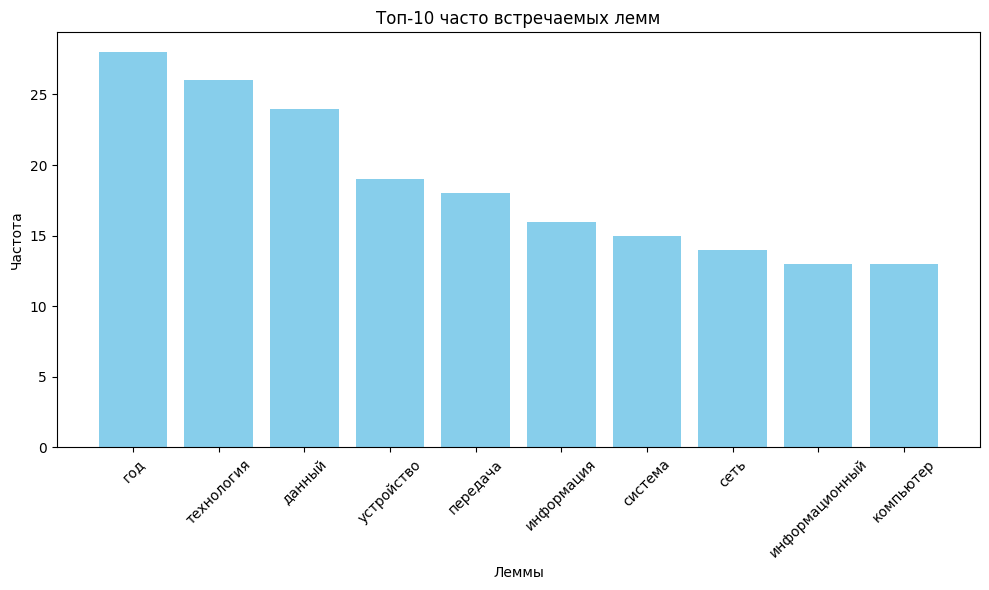

In [6]:
# Визуализация данных (построение графика)

# Распаковка списка кортежей (лемма, частота) на два отдельных списка:
# lemmas - список слов, frequencies - список частот
lemmas, frequencies = zip(*top_10)

# Создание фигуры для графика с заданным размером (10 дюймов в ширину, 6 в высоту)
plt.figure(figsize=(10, 6))

# Создание столбчатой диаграммы (bar plot):
# lemmas - категории по оси X, frequencies - высота столбцов по оси Y
# color='skyblue' - задаем голубой цвет столбцов
plt.bar(lemmas, frequencies, color='skyblue')

# Подпись оси X (название категорий - леммы)
plt.xlabel('Леммы')

# Подпись оси Y (частота встречаемости слов)
plt.ylabel('Частота')

# Заголовок графика
plt.title('Топ-10 часто встречаемых лемм')

# Наклон подписей по оси X на 45 градусов для лучшей читаемости
plt.xticks(rotation=45)

# Автоматическая корректировка параметров графика для предотвращения наложения элементов
plt.tight_layout()

# Отображение графика
plt.show()

In [7]:
# Загрузка данных
df = pd.read_csv('dataset.csv')

# Вывод первых строк
print("Первые 10 строк датасета:")
display(df.head(10))

# Основная информация
print("\nИнформация о структуре данных:")
display(df.info())


Первые 10 строк датасета:


,Lemma,Frequency
0,год,28
1,технология,26
2,данный,24
3,устройство,19
4,передача,18
5,информация,16
6,система,15
7,сеть,14
8,информационный,13
9,компьютер,13



Информация о структуре данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Lemma      756 non-null    object
 1   Frequency  756 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.9+ KB


None

<ipython-input-9-b314cb021329>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


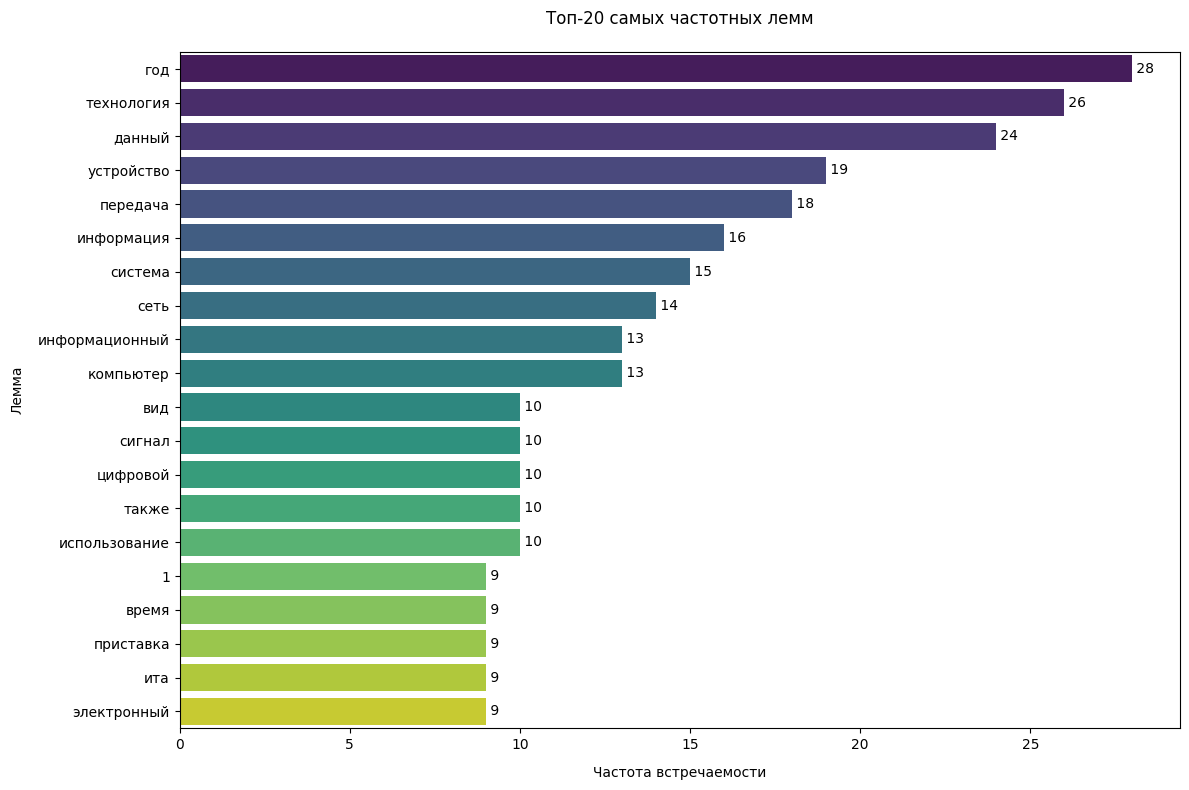

In [9]:
# Импорт необходимых библиотек
import seaborn as sns  # Импорт библиотеки для визуализации
import matplotlib.pyplot as plt  # Импорт библиотеки для построения графиков

# Получение 20 самых частотных лемм из DataFrame
# df.nlargest(20, 'Frequency') - выбирает 20 строк с наибольшими значениями в колонке 'Frequency'
top_20 = df.nlargest(20, 'Frequency')

# Настройка визуализации
# Создаем график размером 12x8 дюймов
plt.figure(figsize=(12, 8))

# Создаем горизонтальную столбчатую диаграмму (barplot) с помощью seaborn
barplot = sns.barplot(
    data=top_20,
    x='Frequency',  # Частота по горизонтальной оси
    y='Lemma',      # Леммы по вертикальной оси
    palette='viridis'  # Цветовая палитра
)

# Добавляем текстовые метки с значениями частот на каждый столбец
for i, freq in enumerate(top_20['Frequency']):
    # Для каждого столбца добавляем текст с форматированием числа
    barplot.text(
        freq,        # x-координата (значение частоты)
        i,           # y-координата (позиция леммы)
        f' {freq:,}', # Форматированное значение (с разделителями тысяч)
        va='center',  # Вертикальное выравнивание по центру
        fontsize=10   # Размер шрифта
    )

# Настройка оформления графика
plt.title('Топ-20 самых частотных лемм', pad=20)  # Заголовок с отступом
plt.xlabel('Частота встречаемости', labelpad=10)  # Подпись оси X
plt.ylabel('Лемма', labelpad=10)                 # Подпись оси Y
plt.tight_layout()  # Автоматическая регулировка отступов

# Отображение графика
plt.show()

In [12]:
import pandas as pd
from google.colab import files  # Для Google Colab
from IPython.display import FileLink  # Для Jupyter Notebook

# Ваш DataFrame (пример)
data = {
    'Lemma': ['технология', 'информация', 'данные', 'система', 'развитие'],
    'Frequency': [150, 120, 95, 80, 65]
}
df = pd.DataFrame(data)

# 1. Сохранение с правильной кодировкой UTF-8 с BOM (для Excel)
df.to_csv('dataset.csv', index=False, encoding='utf-8-sig')  # Обратите внимание на utf-8-sig

# 2. Скачивание файла
# Для Google Colab:
files.download('dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>